In [2]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
train = pd.read_csv("fashionmnist/train.csv")
test = pd.read_csv("fashionmnist/test.csv")

print(train.shape, test.shape)

(60000, 785) (10000, 785)


In [4]:
train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [5]:
test.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0


In [8]:
train_images = train.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
train_images.shape

(60000, 28, 28)

In [9]:
train_images[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

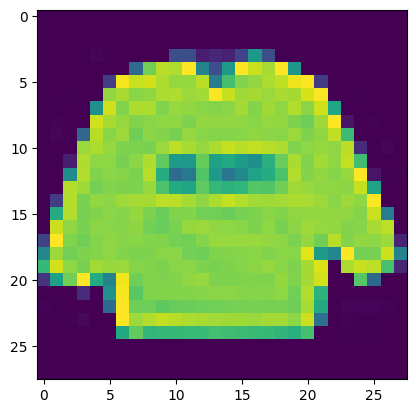

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

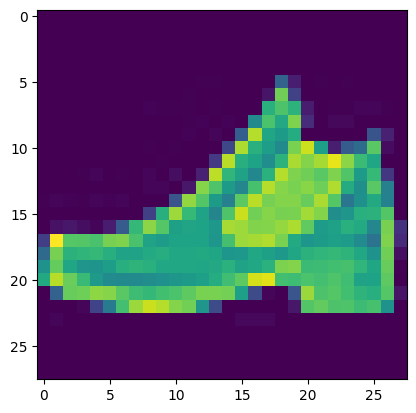

In [11]:
plt.imshow(train_images[1])

In [12]:
y_train = train.loc[:, 'label']
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [16]:
y_train.value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

In [17]:
y_train.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [18]:
target_values = {0 : 'T-shirt/top',
                 1 : 'Trouser',
                 2: 'Pullover',
                 3: 'Dress',
                 4: 'Coat',
                 5: 'Sandal',
                 6: 'Shirt',
                 7: 'Sneaker',
                 8: 'Bag',
                 9: 'Ankle boot'}

In [19]:
y_train[0]

np.int64(2)

In [20]:
target_values[2]

'Pullover'

In [21]:
target_values[y_train[0]]

'Pullover'

In [22]:
# 읽은 test.csv에 들어있는 첫번째, 두번째 이미지를 화면에 보이고,
# 이름이 무엇인지 프린트해보세요.

In [23]:
test.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0


In [24]:
test_images = test.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
test_images.shape

(10000, 28, 28)

In [25]:
test_images[0] # 한장의 이미지

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   4,   0,   0,   0,   0,   0,  62,  61,  21,
         29,  23,  51, 136,  61,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  88, 201, 228, 225, 255, 115,
         62, 137, 255, 235, 222, 255, 135,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229,
        108, 180, 207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,
          0,   0],
       [  

In [26]:
test_images[0][0] # 한장의 이미지에서 첫줄

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [27]:
test_images[0][0][0] # 한장의 이미지에서 첫줄의 첫셀

np.int64(0)

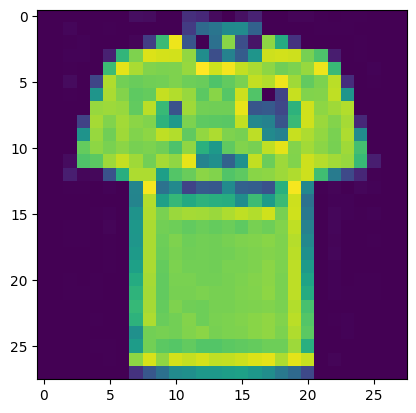

In [28]:
plt.imshow(test_images[0])

In [30]:
y_test = test.loc[:, 'label']
y_test.head()

0    0
1    1
2    2
3    2
4    3
Name: label, dtype: int64

In [31]:
target_values[0]

'T-shirt/top'

In [32]:
## 전처리해서 255나누어서 스케일링을 합시다.!
## 스케일링 0~255
X_train = train_images / 255
X_test = test_images / 255

print("최소값:", X_train[0].min())
print("최대값:", X_train[0].max())

최소값: 0.0
최대값: 1.0


In [33]:
# 채널 차원 추가(3차원--->4차원으로!)
print("변환 전:", X_train.shape, X_test.shape)

변환 전: (60000, 28, 28) (10000, 28, 28)


In [34]:
## 이미지를 딥러닝처리를 할 예정이면, 4차원이 되어야함.
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [35]:
print("변환 후:", X_train.shape, X_test.shape)

변환 후: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [36]:
# Train - Validation 데이터 구분
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val =  train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, shuffle=True, random_state=SEED)
print("학습 데이터셋 크기: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋 크기: ", X_val.shape, y_val.shape)

학습 데이터셋 크기:  (48000, 28, 28, 1) (48000,)
검증 데이터셋 크기:  (12000, 28, 28, 1) (12000,)


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [39]:
mlp_model = Sequential()
# 입력층은 쭉 일렬로 만들어주어야함.
mlp_model.add(Flatten(input_shape=[28,28])) #784
# 은닉층 여러겹 중 한겹만 쌓음.
mlp_model.add(Dense(units=64, activation='relu'))
# 64 --> 32변경 시 예상 효과:
# 파라메터 수 계산 >> 32개의 가중치만 계산에 넣음.
# 784 * 32 ==> 25,120개의 경우의 수를 계산함.(파라메터수)
# 학습 속도는 >> 빨라진다(*)
# 메모리 사용량은 >> 적어진다(*)

# 출력층
mlp_model.add(Dense(units=10, activation='softmax'))

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# softmax가 나온 결과치가 손실이 얼마가 되는지(손실함수)
# 이진분류 --> binary cross entropy
# 다중분류 --> categorical cross entropy

In [41]:
# 가중치를 조절해주어 최적화시켜주는 옵티마이저가 필요
# SGD, Adam(**)

In [42]:
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [43]:
mlp_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# 20번만 읽어서 반복해서 학습하게 하자..epoch(에포크, 주기)
# 이미지 하나씩 읽어서 판단한 다음 손실함수 구해보고, 기울기 조절 반복
# 이미지를 여러개 조금씩 묶어서 판단한 다음 묶은 것의 손실함수를 구해보고,
# 기울기를 조절 반복이 더 효과적. 64개로 묶을 엮음.
# 1주기당 ==> 750회 읽음.
# 미니배치라고 함.
mlp_history = mlp_model.fit(X_tr, y_tr,
                            batch_size=64,
                            epochs=20,
                            validation_data=(X_val, y_val),
                            verbose=2
                            )

Epoch 1/20
750/750 - 5s - 7ms/step - acc: 0.8033 - loss: 0.5704 - val_acc: 0.8404 - val_loss: 0.4563
Epoch 2/20
750/750 - 2s - 3ms/step - acc: 0.8509 - loss: 0.4212 - val_acc: 0.8545 - val_loss: 0.4185
Epoch 3/20
750/750 - 2s - 3ms/step - acc: 0.8632 - loss: 0.3830 - val_acc: 0.8622 - val_loss: 0.3966
Epoch 4/20
750/750 - 3s - 4ms/step - acc: 0.8728 - loss: 0.3579 - val_acc: 0.8676 - val_loss: 0.3813
Epoch 5/20
750/750 - 2s - 3ms/step - acc: 0.8784 - loss: 0.3393 - val_acc: 0.8698 - val_loss: 0.3739
Epoch 6/20
750/750 - 2s - 3ms/step - acc: 0.8834 - loss: 0.3245 - val_acc: 0.8712 - val_loss: 0.3658
Epoch 7/20
750/750 - 2s - 3ms/step - acc: 0.8872 - loss: 0.3126 - val_acc: 0.8732 - val_loss: 0.3614
Epoch 8/20
750/750 - 2s - 3ms/step - acc: 0.8911 - loss: 0.3014 - val_acc: 0.8742 - val_loss: 0.3550
Epoch 9/20
750/750 - 3s - 4ms/step - acc: 0.8943 - loss: 0.2915 - val_acc: 0.8763 - val_loss: 0.3512
Epoch 10/20
750/750 - 3s - 4ms/step - acc: 0.8970 - loss: 0.2826 - val_acc: 0.8771 - val_lo

In [45]:
mlp_history ## 딥러닝에는 epoch를 수행하면서 특정한 상황이 되면 호출할 수 있는 콜백함수가 많이 정의되어있어서 편함.

In [46]:
mlp_history.history #dict

{'acc': [0.8032708168029785,
  0.8508541584014893,
  0.8631874918937683,
  0.8728125095367432,
  0.8783541917800903,
  0.8833958506584167,
  0.8872083425521851,
  0.8910624980926514,
  0.8942708373069763,
  0.8970000147819519,
  0.8994374871253967,
  0.9020624756813049,
  0.9045208096504211,
  0.9076041579246521,
  0.909250020980835,
  0.9117916822433472,
  0.9135624766349792,
  0.9152083396911621,
  0.9167291522026062,
  0.9190000295639038],
 'loss': [0.5704297423362732,
  0.4212398827075958,
  0.3829877972602844,
  0.35785332322120667,
  0.33927786350250244,
  0.3244640827178955,
  0.31259310245513916,
  0.30138465762138367,
  0.2914971709251404,
  0.28261834383010864,
  0.27445122599601746,
  0.2680051326751709,
  0.26009371876716614,
  0.2532672584056854,
  0.24705980718135834,
  0.2417018860578537,
  0.23655599355697632,
  0.2313711792230606,
  0.22619521617889404,
  0.22147125005722046],
 'val_acc': [0.840416669845581,
  0.8544999957084656,
  0.8621666431427002,
  0.8675833344459

In [47]:
mlp_history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

In [48]:
mlp_history.history['acc']

[0.8032708168029785,
 0.8508541584014893,
 0.8631874918937683,
 0.8728125095367432,
 0.8783541917800903,
 0.8833958506584167,
 0.8872083425521851,
 0.8910624980926514,
 0.8942708373069763,
 0.8970000147819519,
 0.8994374871253967,
 0.9020624756813049,
 0.9045208096504211,
 0.9076041579246521,
 0.909250020980835,
 0.9117916822433472,
 0.9135624766349792,
 0.9152083396911621,
 0.9167291522026062,
 0.9190000295639038]

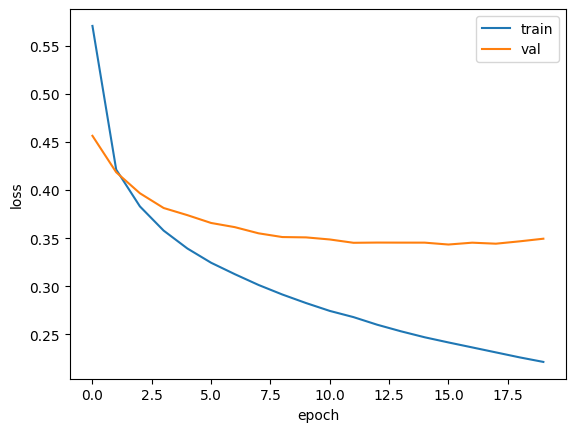

In [49]:
plt.plot(mlp_history.history['loss'])
plt.plot(mlp_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

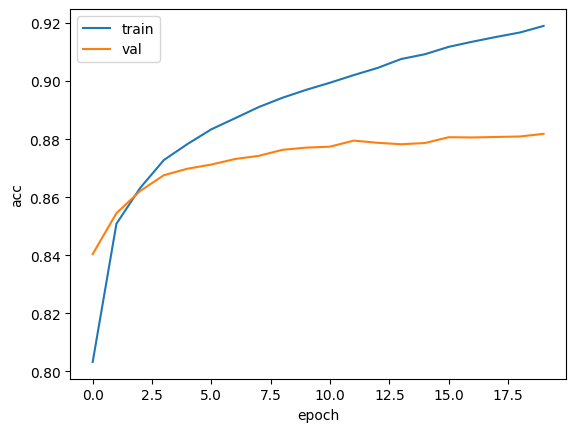

In [50]:
plt.plot(mlp_history.history['acc'])
plt.plot(mlp_history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

In [54]:
mlp2_model = Sequential()
# 입력층은 쭉 일렬로 만들어주어야함.
mlp2_model.add(Flatten(input_shape=[28,28])) #784
# 은닉층 여러겹 중 한겹만 쌓음.
mlp2_model.add(Dense(units=64, activation='relu'))
mlp2_model.add(Dropout(rate=0.5))

# 출력층
mlp2_model.add(Dense(units=10, activation='softmax'))

In [55]:
mlp2_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics = ['acc']
                 )
mlp2_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# call-back 2개 지정: 1) 조기 종료, 최적의 가중치 저장
early_stopping = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
checkpoint = keras.callbacks.ModelCheckpoint('best-mlp2-model.h5')

mlp2_history = mlp2_model.fit(X_tr, y_tr,
                            batch_size=64,
                            epochs=20,
                            validation_data=(X_val, y_val),
                            # callbacks=[가장좋은성능일때가중치파일로저장, 중간멈춤기능],
                            callbacks=[checkpoint, early_stopping],
                            verbose=2
                            )

Epoch 1/20


750/750 - 5s - 6ms/step - acc: 0.7226 - loss: 0.8017 - val_acc: 0.8341 - val_loss: 0.4752
Epoch 2/20


750/750 - 4s - 6ms/step - acc: 0.8014 - loss: 0.5658 - val_acc: 0.8475 - val_loss: 0.4243
Epoch 3/20


750/750 - 5s - 7ms/step - acc: 0.8178 - loss: 0.5151 - val_acc: 0.8528 - val_loss: 0.4080
Epoch 4/20


750/750 - 3s - 4ms/step - acc: 0.8245 - loss: 0.4903 - val_acc: 0.8600 - val_loss: 0.3946
Epoch 5/20


750/750 - 3s - 4ms/step - acc: 0.8274 - loss: 0.4748 - val_acc: 0.8608 - val_loss: 0.3884
Epoch 6/20


750/750 - 3s - 4ms/step - acc: 0.8337 - loss: 0.4624 - val_acc: 0.8651 - val_loss: 0.3775
Epoch 7/20


750/750 - 2s - 3ms/step - acc: 0.8356 - loss: 0.4559 - val_acc: 0.8640 - val_loss: 0.3780
Epoch 8/20


750/750 - 4s - 5ms/step - acc: 0.8385 - loss: 0.4461 - val_acc: 0.8674 - val_loss: 0.3669
Epoch 9/20


750/750 - 3s - 3ms/step - acc: 0.8407 - loss: 0.4379 - val_acc: 0.8704 - val_loss: 0.3621
Epoch 10/20


750/750 - 4s - 5ms/step - acc: 0.8430 - loss: 0.4312 - val_acc: 0.8685 - val_loss: 0.3659
Epoch 11/20


750/750 - 3s - 4ms/step - acc: 0.8446 - loss: 0.4265 - val_acc: 0.8717 - val_loss: 0.3612
Epoch 12/20


750/750 - 5s - 7ms/step - acc: 0.8447 - loss: 0.4236 - val_acc: 0.8728 - val_loss: 0.3607
Epoch 13/20


750/750 - 5s - 6ms/step - acc: 0.8468 - loss: 0.4173 - val_acc: 0.8712 - val_loss: 0.3611
Epoch 14/20


750/750 - 4s - 5ms/step - acc: 0.8483 - loss: 0.4138 - val_acc: 0.8747 - val_loss: 0.3527
Epoch 15/20


750/750 - 2s - 3ms/step - acc: 0.8499 - loss: 0.4067 - val_acc: 0.8731 - val_loss: 0.3527
Epoch 16/20


750/750 - 4s - 5ms/step - acc: 0.8506 - loss: 0.4072 - val_acc: 0.8735 - val_loss: 0.3570
Epoch 17/20


750/750 - 4s - 5ms/step - acc: 0.8501 - loss: 0.4042 - val_acc: 0.8727 - val_loss: 0.3586
Epoch 18/20


750/750 - 4s - 5ms/step - acc: 0.8520 - loss: 0.3993 - val_acc: 0.8742 - val_loss: 0.3545
Epoch 19/20


750/750 - 6s - 8ms/step - acc: 0.8534 - loss: 0.3961 - val_acc: 0.8726 - val_loss: 0.3556
Epoch 20/20


750/750 - 5s - 7ms/step - acc: 0.8552 - loss: 0.3898 - val_acc: 0.8763 - val_loss: 0.3503


In [57]:
mlp2_model.evaluate(X_val, y_val) #학습된 결과로 검증해보자.

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8763 - loss: 0.3503


[0.3503091633319855, 0.8763333559036255]

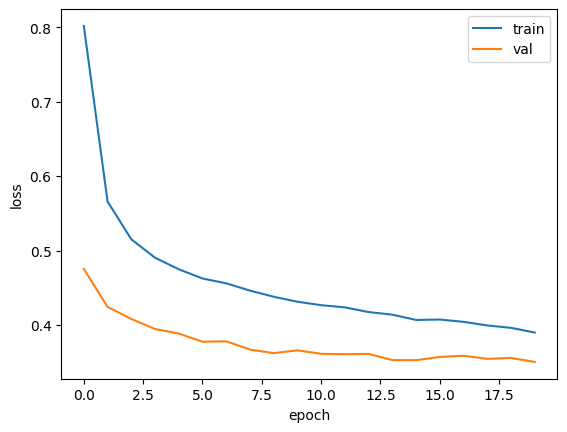

In [58]:
plt.plot(mlp2_history.history['loss'])
plt.plot(mlp2_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

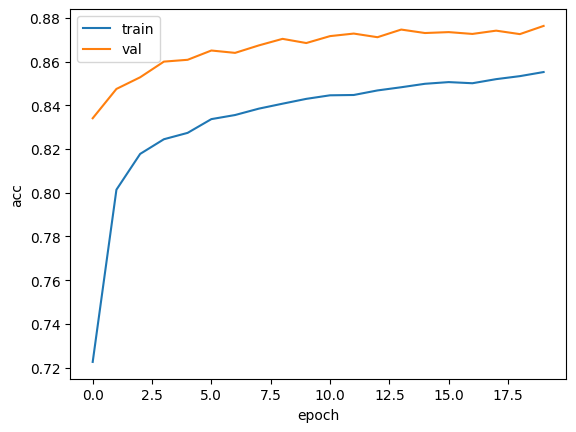

In [59]:
plt.plot(mlp2_history.history['acc'])
plt.plot(mlp2_history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

In [60]:
from tensorflow.keras.models import load_model
best_model = load_model('best-mlp2-model.h5')
best_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,892 (198.80 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [62]:
y_pred_proba = best_model.predict(X_val[0:1])
y_pred_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[1.2429906e-03, 5.2457303e-04, 6.1120331e-01, 6.8674382e-04,
        3.6189827e-01, 3.7514589e-11, 2.4369000e-02, 1.7294018e-13,
        7.5181575e-05, 5.7610400e-13]], dtype=float32)

In [63]:
np.argmax(y_pred_proba) #리스트의 값중에서 최고값의 위치를 알려줌.

np.int64(2)

In [64]:
target_values[2]

'Pullover'

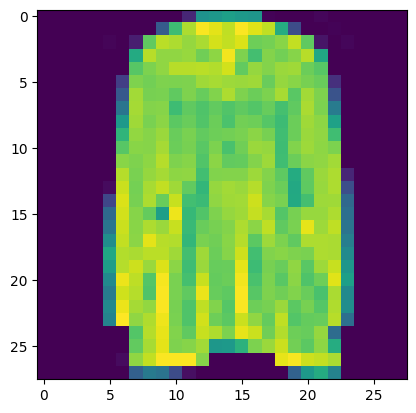

In [65]:
plt.imshow(X_val[0].reshape(28,28))

In [67]:
y_val

10873    6
10884    7
59646    4
26147    1
27930    0
        ..
17796    1
34934    9
25996    4
31341    3
53695    5
Name: label, Length: 12000, dtype: int64

In [68]:
## 전처리하여 특성을 부여하자....
## 여러가지 이미지의 특성을 자동으로 찾아내고 요약해서 그 결과를 딥러닝에 넣자.
from tensorflow.keras.layers import Conv2D, MaxPooling2D
cnn_model = Sequential()
## 전처리(필터를 거쳐서 특성을 부여한 것을 모은 다음, 요약한다.)
cnn_model.add(Conv2D(filters=16,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=[28,28,1]
                     ))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dropout(rate=0.5))
cnn_model.add(Dense(units=10, activation='softmax'))

cnn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics = ['acc']
                 )
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       173,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,930 (679.41 KB)

 Trainable params: 173,930 (679.41 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
# call-back 2개 지정: 1) 조기 종료, 최적의 가중치 저장
early_stopping2 = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
# 검증 성능(보통 val_loss 또는 monitor로 지정한 값)이 개선되지 않는 상태가 “연속 3번” 발생하면 학습을 멈춘다.
checkpoint2 = keras.callbacks.ModelCheckpoint('best-cnn2-model.h5')

cnn_history = cnn_model.fit(X_tr, y_tr,
                             batch_size=64,
                             epochs=20,
                             validation_data=(X_val, y_val),
                             callbacks = [ checkpoint2, early_stopping2 ],
                             verbose=2)

Epoch 1/20


750/750 - 8s - 10ms/step - acc: 0.9042 - loss: 0.2566 - val_acc: 0.9054 - val_loss: 0.2654
Epoch 2/20


750/750 - 9s - 12ms/step - acc: 0.9067 - loss: 0.2526 - val_acc: 0.9053 - val_loss: 0.2625
Epoch 3/20


750/750 - 10s - 13ms/step - acc: 0.9099 - loss: 0.2440 - val_acc: 0.9036 - val_loss: 0.2729
Epoch 4/20


750/750 - 9s - 12ms/step - acc: 0.9092 - loss: 0.2376 - val_acc: 0.9057 - val_loss: 0.2738
Epoch 5/20


750/750 - 10s - 14ms/step - acc: 0.9123 - loss: 0.2332 - val_acc: 0.9063 - val_loss: 0.2716


In [83]:
## 검증데이터로 검증해보세요.
cnn_model.evaluate(X_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9053 - loss: 0.2625


[0.26245662569999695, 0.9052500128746033]

In [84]:
## 모델파일로 읽어서 요약해보세요.
best_model = load_model('best-cnn2-model.h5')
best_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       173,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,932 (679.43 KB)

 Trainable params: 173,930 (679.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [75]:
best_model.weights

<Variable path=sequential_5/conv2d/kernel, shape=(3, 3, 1, 16), dtype=float32, value=[[[[ 0.24633132 -0.4124722  -0.17283021  0.44795465 -2.3844376
     0.03651116  0.2750512  -0.09890255  0.48537087  0.10969856
     0.24070884 -0.08805071 -0.17733704 -0.34999564  0.5802068
    -0.19868894]]

  [[ 0.29584292 -0.02041612  0.3734065  -0.4183795  -1.8231881
    -0.58459526 -0.3086682  -0.08087672  0.32877794 -0.10620634
    -0.32206383 -0.17600791  0.02511644  0.35457113  0.2061922
    -0.11882348]]

  [[-0.03222538 -0.50392926 -0.30728653 -0.49524742 -0.49512962
     0.44118255 -0.21437818  0.23046839 -0.7173356   0.6822445
    -0.93544936  0.3046557   0.10304999  0.02342515 -0.66219914
     0.33688444]]]


 [[[-0.0978558  -0.29434738  0.12306704  0.36629945 -0.9738649
     0.08893675  0.3390265  -0.38338095  0.16327094  0.32663223
     0.26571304 -0.20229469 -0.0703272  -0.39300954  0.36070475
    -0.1562988 ]]

  [[ 0.06699191  0.08215594 -0.07161908  0.07922127 -1.3814093
     0.19454

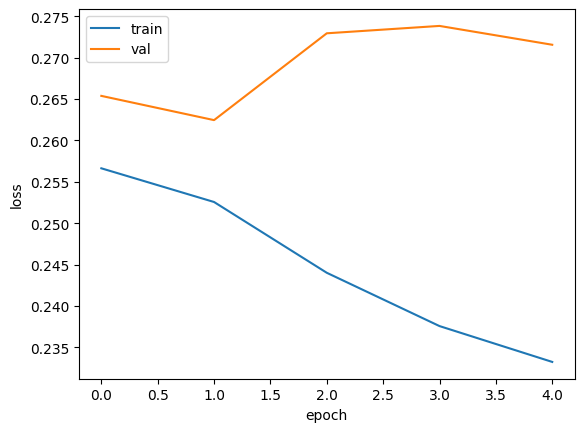

In [85]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

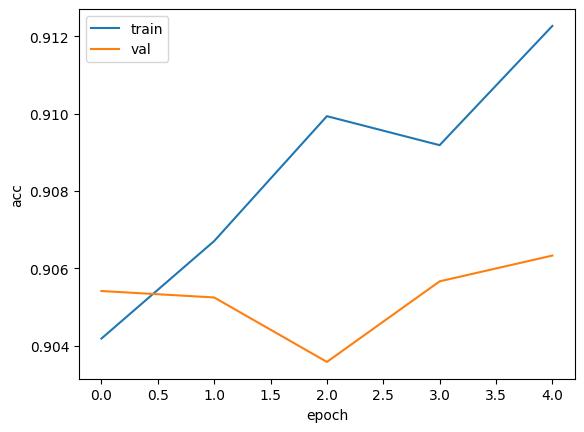

In [86]:
## acc그래프로 그려보세요.
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'val'])
plt.show()

In [87]:
## 검증데이터 첫번째것으로 예측 --> coat가 나와야함.
y_pred_proba = best_model.predict(X_val[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


In [88]:
np.argmax(y_pred_proba)

np.int64(4)

In [89]:
target_values[4]

'Coat'